### Introduction

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import*
from tensorflow import keras

# sklearn 10FCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Keras 
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SpatialDropout3D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

seed = 1
np.random.seed(seed)

plt.rcParams["figure.figsize"] = (15,5)

### Opening the dataset, brief data exploration and data pre-processing

In [3]:
# Read the csv file 
data = pd.read_csv("X00205680.csv")
data.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0,1,1,22,1,0,0,1,1,1,...,0,1,0,0,0,1,11,6,7,0
1,0,1,1,23,1,0,0,0,0,1,...,0,4,0,3,1,0,8,4,7,0
2,0,1,1,25,1,0,0,1,0,1,...,0,2,0,0,0,1,9,4,8,1
3,0,0,1,19,0,0,0,0,1,1,...,0,2,0,0,0,1,4,6,8,0
4,1,0,1,29,1,0,0,1,1,1,...,0,3,0,0,0,0,9,4,7,1


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,42415.0,0.563904,0.495905,0.0,0.0,1.0,1.0,1.0
HighChol,42415.0,0.527526,0.499248,0.0,0.0,1.0,1.0,1.0
CholCheck,42415.0,0.975221,0.155453,0.0,1.0,1.0,1.0,1.0
BMI,42415.0,29.892727,7.130757,13.0,25.0,29.0,33.0,98.0
Smoker,42415.0,0.476482,0.499453,0.0,0.0,0.0,1.0,1.0
Stroke,42415.0,0.062054,0.241256,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,42415.0,0.148391,0.355491,0.0,0.0,0.0,0.0,1.0
PhysActivity,42415.0,0.701898,0.457430,0.0,0.0,1.0,1.0,1.0
Fruits,42415.0,0.614476,0.486725,0.0,0.0,1.0,1.0,1.0
Veggies,42415.0,0.789320,0.407796,0.0,1.0,1.0,1.0,1.0


In [5]:
print("The size of the data is (in KB):", data.size)
print("The shape of the data is (Rows x Columns):", data.shape)
print(data.columns)

The size of the data is (in KB): 933130
The shape of the data is (Rows x Columns): (42415, 22)
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')


In [6]:
# Check the data variable types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                42415 non-null  int64
 1   HighChol              42415 non-null  int64
 2   CholCheck             42415 non-null  int64
 3   BMI                   42415 non-null  int64
 4   Smoker                42415 non-null  int64
 5   Stroke                42415 non-null  int64
 6   HeartDiseaseorAttack  42415 non-null  int64
 7   PhysActivity          42415 non-null  int64
 8   Fruits                42415 non-null  int64
 9   Veggies               42415 non-null  int64
 10  HvyAlcoholConsump     42415 non-null  int64
 11  AnyHealthcare         42415 non-null  int64
 12  NoDocbcCost           42415 non-null  int64
 13  GenHlth               42415 non-null  int64
 14  MentHlth              42415 non-null  int64
 15  PhysHlth              42415 non-null  int64
 16  Diff

In [7]:
# Check any empty / missing data
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [8]:
data.duplicated().sum()

703

In [9]:
data.loc[data.duplicated(),:]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
1019,0,1,1,26,0,0,0,1,1,1,...,0,2,0,0,0,1,7,6,8,0
1535,0,0,1,38,0,0,0,1,1,1,...,0,3,0,0,0,1,7,6,8,0
1963,0,0,1,22,0,0,0,1,1,1,...,0,2,0,0,0,0,7,6,8,0
2279,1,0,1,31,0,0,0,1,0,1,...,0,3,0,0,0,1,11,6,7,1
2301,1,1,1,26,1,0,0,1,1,1,...,0,3,0,0,0,1,11,6,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42196,0,0,1,21,1,0,0,1,1,1,...,0,1,0,0,0,0,4,6,8,0
42212,1,0,1,25,0,0,0,1,1,1,...,0,1,0,0,0,1,7,6,8,0
42264,1,1,1,32,1,0,0,1,1,1,...,0,3,0,0,0,1,9,5,7,1
42303,0,0,1,32,0,0,0,1,1,1,...,0,2,0,0,0,0,4,6,8,0


In [10]:
print("The shape of the data before is (Rows x Columns):", data.shape)
data.drop_duplicates(inplace=True)
print("The shape of the data after is (Rows x Columns):", data.shape)

The shape of the data before is (Rows x Columns): (42415, 22)
The shape of the data after is (Rows x Columns): (41712, 22)


In [11]:
data['Diabetes_binary'].value_counts()

1    21135
0    20577
Name: Diabetes_binary, dtype: int64

*** 0 - No Diabetes ***

*** 1 - Diabetes ***

After checking and removing the missing (null) and duplicate data, so we don't need to fill up or drop any data. Besides that, all columns are numerical number so we also don't need to do any label encoder or get_dummies (one-hot encoding). So for the next step in pre-processing will be split the data into X and Y dataset which seperate the label class from others. Besides that, we will also normalised the data before start putting into Deep Learning models.

In [12]:
col = data.values

X = col[:, 0:21]
Y = col[:, 21]

print("Before Normalized: \n", X)

scaler = preprocessing.Normalizer().fit(X)
normalizedX = scaler.transform(X)

print("\nAfter Normalized: \n", normalizedX)

Before Normalized: 
 [[ 0  1  1 ... 11  6  7]
 [ 0  1  1 ...  8  4  7]
 [ 0  1  1 ...  9  4  8]
 ...
 [ 1  0  1 ... 11  6  7]
 [ 1  1  1 ... 10  5  8]
 [ 0  0  1 ...  1  5  3]]

After Normalized: 
 [[0.         0.03782347 0.03782347 ... 0.41605821 0.22694084 0.26476432]
 [0.         0.03809697 0.03809697 ... 0.30477573 0.15238786 0.26667876]
 [0.         0.03542182 0.03542182 ... 0.31879636 0.14168727 0.28337454]
 ...
 [0.0256579  0.         0.0256579  ... 0.2822369  0.1539474  0.1796053 ]
 [0.02400768 0.02400768 0.02400768 ... 0.24007684 0.12003842 0.19206147]
 [0.         0.         0.04559608 ... 0.04559608 0.22798038 0.13678823]]


After normalized the X data, we will now able to split the X and Y data into train and test for further machine learning.

In [13]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.33, random_state=seed, shuffle = True, stratify=(Y))


# Examine the class breakdown per dataset:
print("Training dataset length:", len(X_train))
print("Testing dataset length:", len(X_test))

class1TrainingPer = np.count_nonzero(Y_train == 1) / len(X_train)
class1TestPer = np.count_nonzero(Y_test == 1) / len(X_test)

print("\nPercentage of 1's in Training data: ", round(class1TrainingPer*100,2), "%")
print("Percentage of 1's in Test data    : ", round(class1TestPer*100,2), "%")

Training dataset length: 27947
Testing dataset length: 13765

Percentage of 1's in Training data:  50.67 %
Percentage of 1's in Test data    :  50.67 %


From the description above, we know that the dataset for training and testing contains almost equal (50%) between the 0 and 1 label which will given a better outcome after the machine learning model implement. Before moving to the next step, ;et see the heatmap for this dataset so we can observed which columns are highly related and which are not.

<AxesSubplot:>

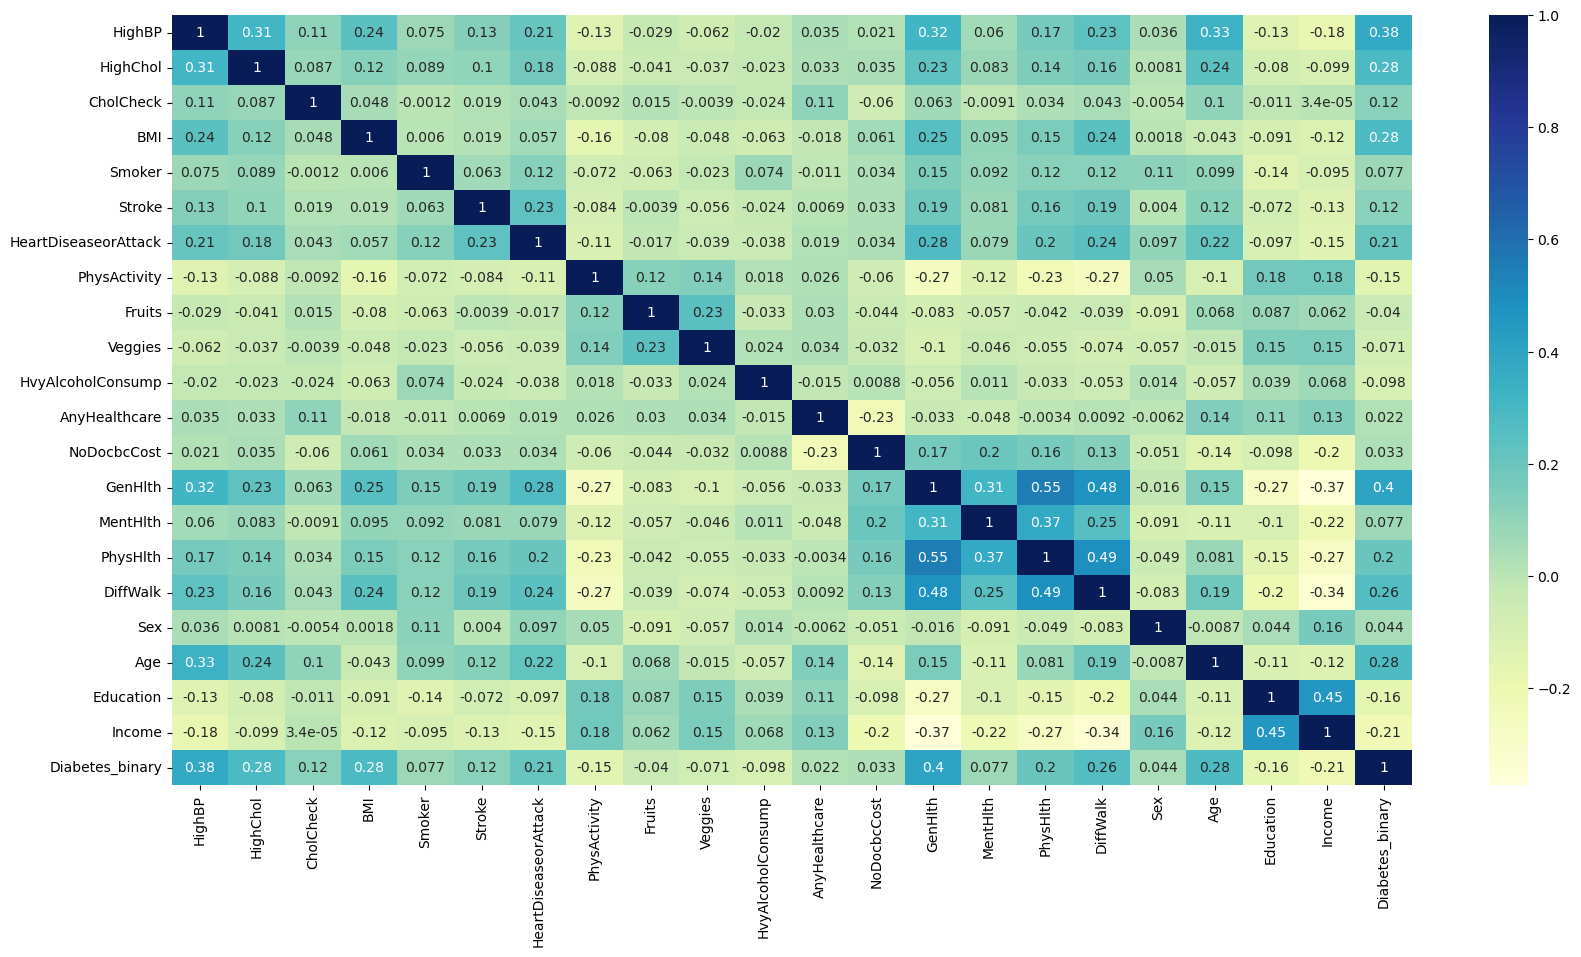

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

From the heatmap above, we notice that most of the attributes are not highly correlated with the 'Diabetes_binary'. The highest correlated attribute is 'GenHlth', coming up with 'HighBP' which stand for 'General Health' and 'High Blood Preasure'. 

### Model Exploration to determine network topology
- 8 required

In [15]:
# Funtion to provide plot for loss and accuracy
def plot_acc_loss(results):
  plt.subplot(1,2,1)
  # summarize history for loss
  plt.plot(results.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(results.history['acc'])
  plt.title('model accuracy')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

#### Build the model (relative large)

Train on 27947 samples
Epoch 1/30
27947/27947 [==============================] - 7s 254us/sample - loss: 0.6931 - acc: 0.5036
Epoch 2/30
27947/27947 [==============================] - 5s 167us/sample - loss: 0.6931 - acc: 0.5067
Epoch 3/30
27947/27947 [==============================] - 6s 199us/sample - loss: 0.6931 - acc: 0.5067
Epoch 4/30
27947/27947 [==============================] - 6s 221us/sample - loss: 0.6931 - acc: 0.5067
Epoch 5/30
27947/27947 [==============================] - 6s 220us/sample - loss: 0.6931 - acc: 0.5067
Epoch 6/30
27947/27947 [==============================] - 6s 232us/sample - loss: 0.6931 - acc: 0.5067
Epoch 7/30
27947/27947 [==============================] - 7s 258us/sample - loss: 0.6931 - acc: 0.5067
Epoch 8/30
27947/27947 [==============================] - 6s 221us/sample - loss: 0.6931 - acc: 0.5067
Epoch 9/30
27947/27947 [==============================] - 6s 218us/sample - loss: 0.6931 - acc: 0.5067
Epoch 10/30
27947/27947 [=========================

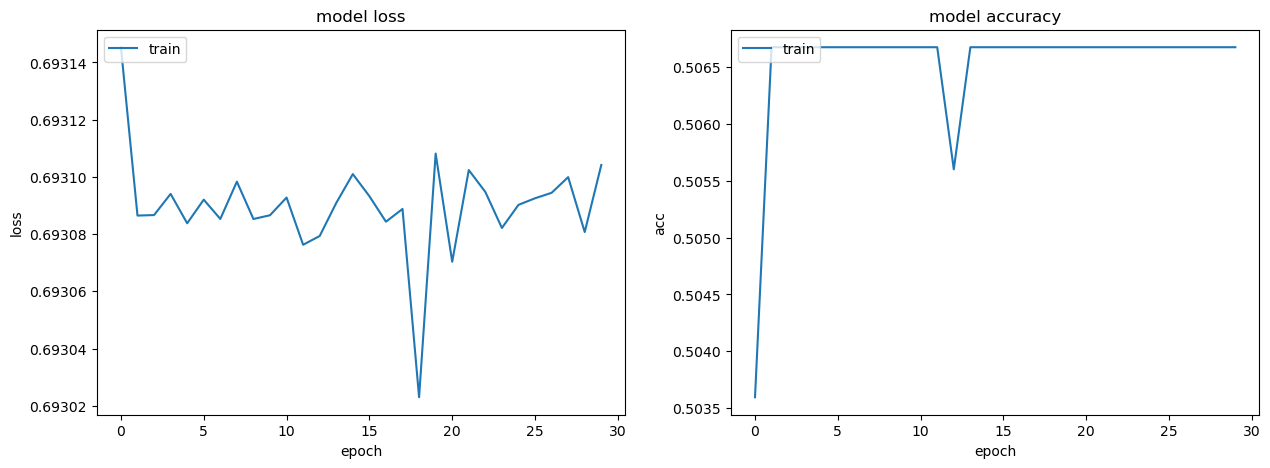

13765/13765 [==============================] - 2s 139us/sample - loss: 0.6931 - acc: 0.5067
Acuracy:  0.50671995
Predicted      1    All
Actual                 
0           6790   6790
1           6975   6975
All        13765  13765


In [16]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(1000, input_dim = 21, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Build the model (relative large - medium)

Train on 27947 samples
Epoch 1/30
27947/27947 [==============================] - 6s 230us/sample - loss: 0.5555 - acc: 0.7133
Epoch 2/30
27947/27947 [==============================] - 6s 221us/sample - loss: 0.5345 - acc: 0.7303
Epoch 3/30
27947/27947 [==============================] - 6s 201us/sample - loss: 0.5292 - acc: 0.7355
Epoch 4/30
27947/27947 [==============================] - 7s 236us/sample - loss: 0.5261 - acc: 0.7376
Epoch 5/30
27947/27947 [==============================] - 6s 214us/sample - loss: 0.5239 - acc: 0.7400
Epoch 6/30
27947/27947 [==============================] - 5s 197us/sample - loss: 0.5221 - acc: 0.7424
Epoch 7/30
27947/27947 [==============================] - 6s 200us/sample - loss: 0.5209 - acc: 0.7403
Epoch 8/30
27947/27947 [==============================] - 6s 204us/sample - loss: 0.5202 - acc: 0.7421
Epoch 9/30
27947/27947 [==============================] - 6s 215us/sample - loss: 0.5195 - acc: 0.7420
Epoch 10/30
27947/27947 [=========================

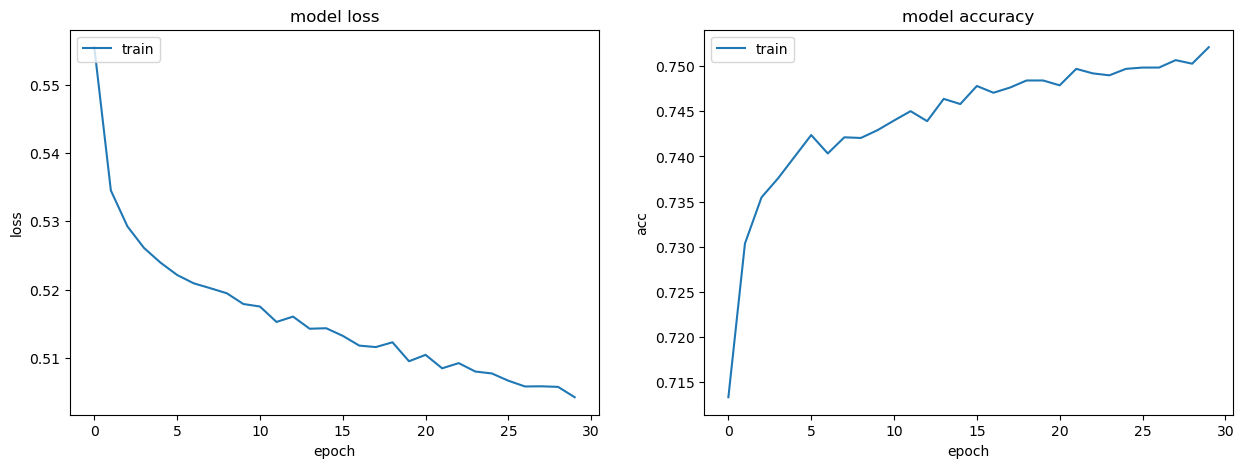

13765/13765 [==============================] - 2s 139us/sample - loss: 0.5207 - acc: 0.7411
Acuracy:  0.74108243
Predicted     0     1    All
Actual                      
0          4357  2433   6790
1          1131  5844   6975
All        5488  8277  13765


In [17]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(500, input_dim = 21, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Build the model (relative medium)

Train on 27947 samples
Epoch 1/30
27947/27947 [==============================] - 7s 257us/sample - loss: 0.5554 - acc: 0.7159
Epoch 2/30
27947/27947 [==============================] - 6s 228us/sample - loss: 0.5348 - acc: 0.7290
Epoch 3/30
27947/27947 [==============================] - 7s 264us/sample - loss: 0.5303 - acc: 0.7340
Epoch 4/30
27947/27947 [==============================] - 6s 224us/sample - loss: 0.5270 - acc: 0.7373
Epoch 5/30
27947/27947 [==============================] - 6s 222us/sample - loss: 0.5252 - acc: 0.7388
Epoch 6/30
27947/27947 [==============================] - 7s 234us/sample - loss: 0.5228 - acc: 0.7407
Epoch 7/30
27947/27947 [==============================] - 7s 243us/sample - loss: 0.5216 - acc: 0.7387
Epoch 8/30
27947/27947 [==============================] - 7s 251us/sample - loss: 0.5197 - acc: 0.7433
Epoch 9/30
27947/27947 [==============================] - 7s 243us/sample - loss: 0.5195 - acc: 0.7419
Epoch 10/30
27947/27947 [=========================

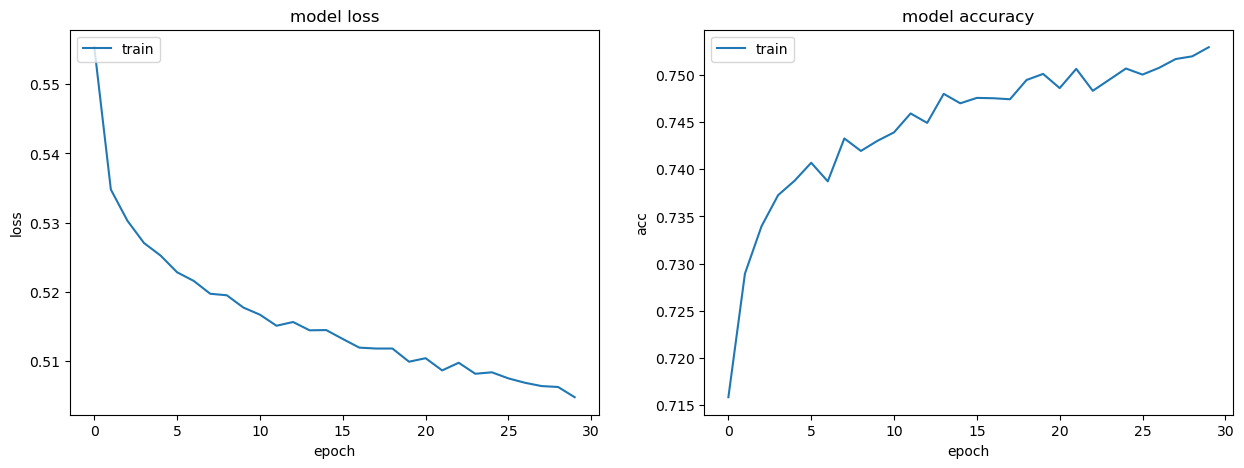

13765/13765 [==============================] - 2s 168us/sample - loss: 0.5185 - acc: 0.7442
Acuracy:  0.7442063
Predicted     0     1    All
Actual                      
0          4559  2231   6790
1          1290  5685   6975
All        5849  7916  13765


In [18]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(100, input_dim = 21, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Build the model (relative medium - small)

Train on 27947 samples
Epoch 1/30
27947/27947 [==============================] - 7s 239us/sample - loss: 0.5891 - acc: 0.6997
Epoch 2/30
27947/27947 [==============================] - 6s 208us/sample - loss: 0.5344 - acc: 0.7325
Epoch 3/30
27947/27947 [==============================] - 6s 206us/sample - loss: 0.5292 - acc: 0.7365
Epoch 4/30
27947/27947 [==============================] - 6s 231us/sample - loss: 0.5268 - acc: 0.7375
Epoch 5/30
27947/27947 [==============================] - 7s 241us/sample - loss: 0.5240 - acc: 0.7397
Epoch 6/30
27947/27947 [==============================] - 6s 213us/sample - loss: 0.5226 - acc: 0.7404
Epoch 7/30
27947/27947 [==============================] - 6s 217us/sample - loss: 0.5216 - acc: 0.7404
Epoch 8/30
27947/27947 [==============================] - 6s 219us/sample - loss: 0.5205 - acc: 0.7423
Epoch 9/30
27947/27947 [==============================] - 7s 243us/sample - loss: 0.5205 - acc: 0.7418
Epoch 10/30
27947/27947 [=========================

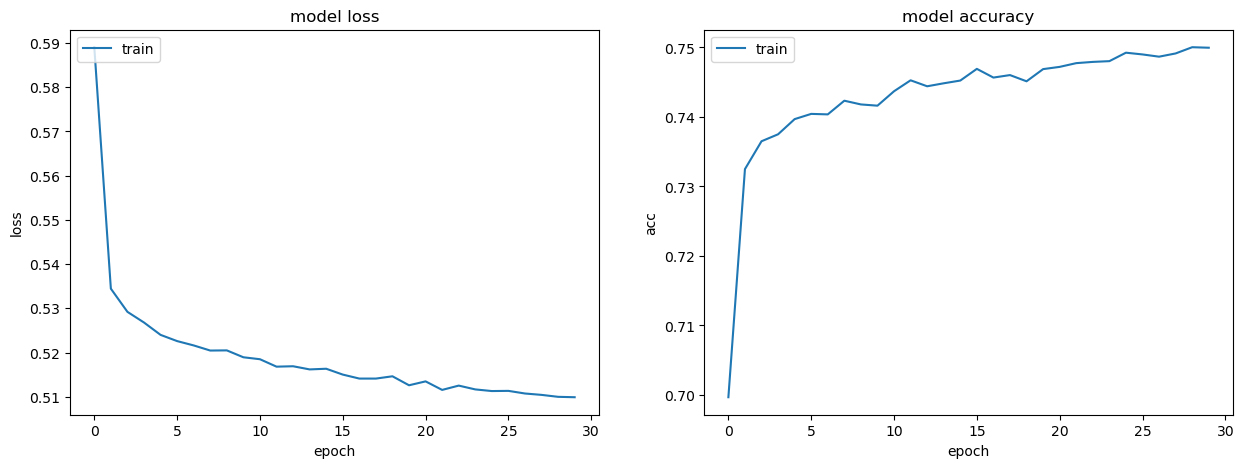

13765/13765 [==============================] - 3s 194us/sample - loss: 0.5176 - acc: 0.7435
Acuracy:  0.74347985
Predicted     0     1    All
Actual                      
0          4504  2286   6790
1          1245  5730   6975
All        5749  8016  13765


In [19]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(50, input_dim = 21, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()


# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Building the model (relative small)

Train on 27947 samples
Epoch 1/30
27947/27947 [==============================] - 8s 280us/sample - loss: 0.6325 - acc: 0.6625
Epoch 2/30
27947/27947 [==============================] - 6s 203us/sample - loss: 0.5514 - acc: 0.7231
Epoch 3/30
27947/27947 [==============================] - 6s 198us/sample - loss: 0.5439 - acc: 0.7288
Epoch 4/30
27947/27947 [==============================] - 6s 228us/sample - loss: 0.5408 - acc: 0.7302
Epoch 5/30
27947/27947 [==============================] - 6s 197us/sample - loss: 0.5380 - acc: 0.7346
Epoch 6/30
27947/27947 [==============================] - 5s 193us/sample - loss: 0.5367 - acc: 0.7336
Epoch 7/30
27947/27947 [==============================] - 5s 192us/sample - loss: 0.5348 - acc: 0.7352
Epoch 8/30
27947/27947 [==============================] - 5s 193us/sample - loss: 0.5336 - acc: 0.7353
Epoch 9/30
27947/27947 [==============================] - 6s 226us/sample - loss: 0.5321 - acc: 0.7361
Epoch 10/30
27947/27947 [=========================

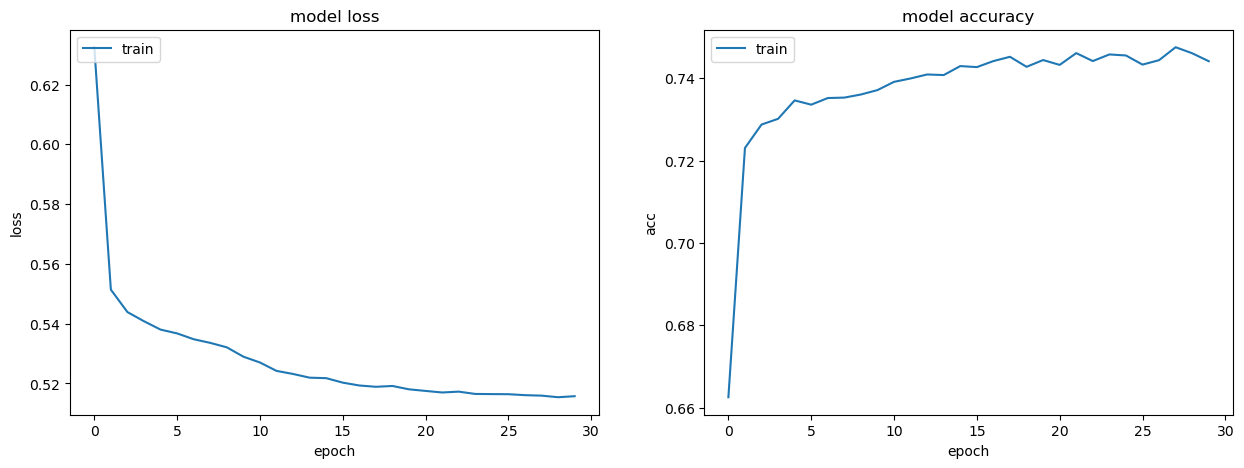

13765/13765 [==============================] - 2s 144us/sample - loss: 0.5199 - acc: 0.7428
Acuracy:  0.742826
Predicted     0     1    All
Actual                      
0          4549  2241   6790
1          1299  5676   6975
All        5848  7917  13765


In [20]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(10, input_dim = 21, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

From the test above from the models, we noticed that the small to medium model is perform way better than the large model. This might because of the correlation between attributes and the label class is not highly correlated, so the model will work better with small model. So for further testing, we will keep tuning in medium to small network.

#### Further testing - between small and small - medium

Train on 27947 samples
Epoch 1/50
27947/27947 [==============================] - 8s 274us/sample - loss: 0.6070 - acc: 0.6804
Epoch 2/50
27947/27947 [==============================] - 6s 213us/sample - loss: 0.5452 - acc: 0.7297
Epoch 3/50
27947/27947 [==============================] - 6s 210us/sample - loss: 0.5375 - acc: 0.7316
Epoch 4/50
27947/27947 [==============================] - 6s 207us/sample - loss: 0.5327 - acc: 0.7345
Epoch 5/50
27947/27947 [==============================] - 6s 213us/sample - loss: 0.5284 - acc: 0.7363
Epoch 6/50
27947/27947 [==============================] - 7s 252us/sample - loss: 0.5256 - acc: 0.7391
Epoch 7/50
27947/27947 [==============================] - 5s 195us/sample - loss: 0.5239 - acc: 0.7388
Epoch 8/50
27947/27947 [==============================] - 5s 192us/sample - loss: 0.5226 - acc: 0.7394
Epoch 9/50
27947/27947 [==============================] - 6s 200us/sample - loss: 0.5216 - acc: 0.7410
Epoch 10/50
27947/27947 [=========================

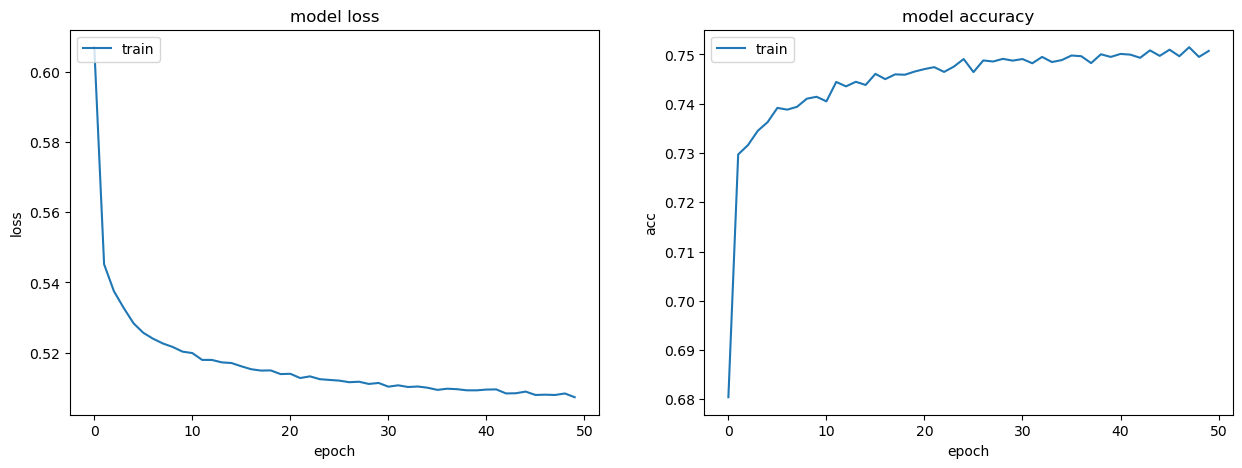

13765/13765 [==============================] - 2s 133us/sample - loss: 0.5151 - acc: 0.7461
Acuracy:  0.7460952
Predicted     0     1    All
Actual                      
0          4584  2206   6790
1          1289  5686   6975
All        5873  7892  13765


In [21]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, input_dim = 21, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Compare the result with small, the performance almost the same, maybe we can try with different number

Train on 27947 samples
Epoch 1/50
27947/27947 [==============================] - 6s 211us/sample - loss: 1.1404 - acc: 0.5780
Epoch 2/50
27947/27947 [==============================] - 5s 179us/sample - loss: 0.5875 - acc: 0.6727
Epoch 3/50
27947/27947 [==============================] - 6s 218us/sample - loss: 0.5493 - acc: 0.7224
Epoch 4/50
27947/27947 [==============================] - 5s 172us/sample - loss: 0.5429 - acc: 0.7290
Epoch 5/50
27947/27947 [==============================] - 5s 172us/sample - loss: 0.5395 - acc: 0.7311
Epoch 6/50
27947/27947 [==============================] - 5s 175us/sample - loss: 0.5379 - acc: 0.7319
Epoch 7/50
27947/27947 [==============================] - 5s 173us/sample - loss: 0.5364 - acc: 0.7322
Epoch 8/50
27947/27947 [==============================] - 5s 183us/sample - loss: 0.5356 - acc: 0.7346
Epoch 9/50
27947/27947 [==============================] - 6s 208us/sample - loss: 0.5348 - acc: 0.7319
Epoch 10/50
27947/27947 [=========================

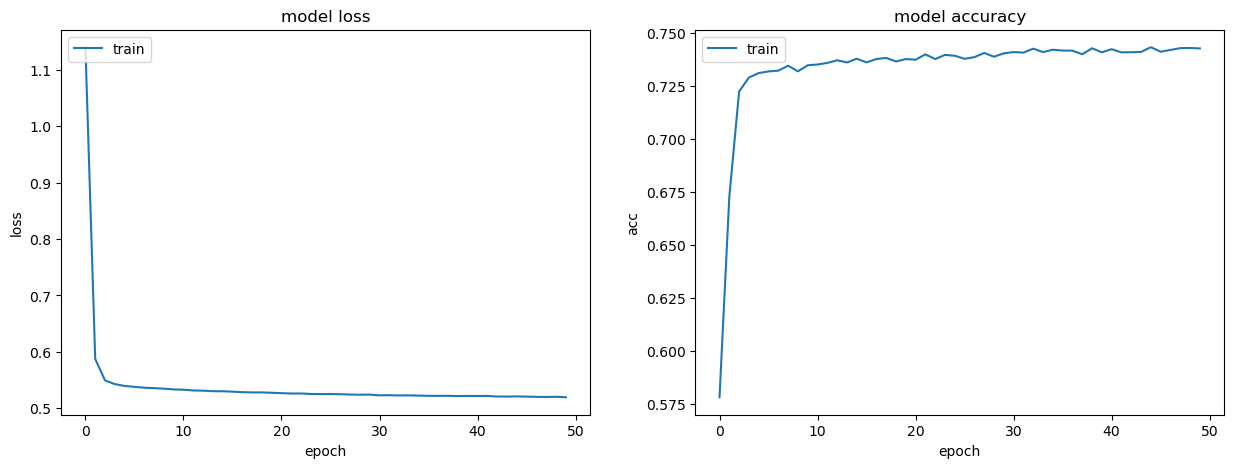

13765/13765 [==============================] - 2s 132us/sample - loss: 0.5230 - acc: 0.7439
Acuracy:  0.74391574
Predicted     0     1    All
Actual                      
0          4787  2003   6790
1          1522  5453   6975
All        6309  7456  13765


In [22]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Train on 27947 samples
Epoch 1/50
27947/27947 [==============================] - 7s 268us/sample - loss: 0.7240 - acc: 0.6297
Epoch 2/50
27947/27947 [==============================] - 6s 204us/sample - loss: 0.5546 - acc: 0.7227
Epoch 3/50
27947/27947 [==============================] - 6s 201us/sample - loss: 0.5384 - acc: 0.7316
Epoch 4/50
27947/27947 [==============================] - 6s 202us/sample - loss: 0.5333 - acc: 0.7354
Epoch 5/50
27947/27947 [==============================] - 6s 202us/sample - loss: 0.5305 - acc: 0.7364
Epoch 6/50
27947/27947 [==============================] - 7s 239us/sample - loss: 0.5291 - acc: 0.7363
Epoch 7/50
27947/27947 [==============================] - 5s 191us/sample - loss: 0.5278 - acc: 0.7361
Epoch 8/50
27947/27947 [==============================] - 5s 189us/sample - loss: 0.5271 - acc: 0.7380
Epoch 9/50
27947/27947 [==============================] - 5s 189us/sample - loss: 0.5262 - acc: 0.7381
Epoch 10/50
27947/27947 [=========================

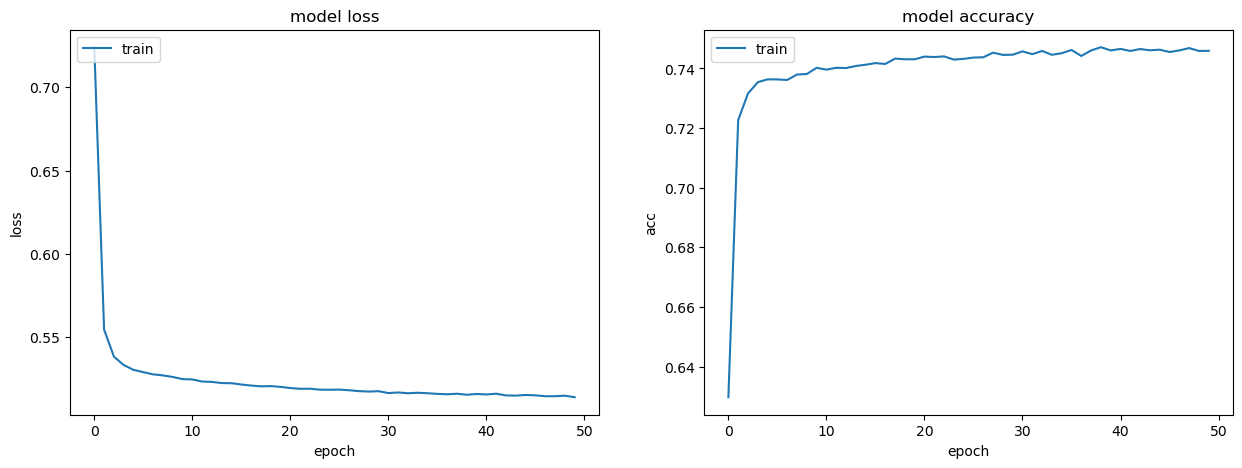

13765/13765 [==============================] - 2s 131us/sample - loss: 0.5185 - acc: 0.7464
Acuracy:  0.74638575
Predicted     0     1    All
Actual                      
0          4776  2014   6790
1          1477  5498   6975
All        6253  7512  13765


In [23]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

After some tweaking on the layers, the results showed that the accuracy is around 75.6%. So i'll use the last neural network as it got the highest accuracy on no diabetes which is 4750 / 6790.

### Hyperparameter investigation 
- 8 batch sizes [suitable epochs]
- 3 optimizers
- 2 or more regularization techniques

In [24]:
# Funtion to provide plot for loss and accuracy
def plot_acc_loss2(results):
  plt.subplot(1,2,1)
  # summarize history for loss
  plt.plot(results.history['loss'])
  plt.plot(results.history['val_loss'])
  plt.title('Model Loss ')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(results.history['acc'])
  plt.plot(results.history['val_acc'])
  plt.title('Model Accuracy')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

#### Trying with different batch sizes and epochs.
- During the model was testing with different capacity and depth, the model were trained with batch sizes = 32. So we will tried other here.

 ************************ Testing ************************ 


Train on 27947 samples, validate on 13765 samples
Epoch 1/10
27947/27947 [==============================] - 194s 7ms/sample - loss: 0.5801 - acc: 0.6999 - val_loss: 0.5348 - val_acc: 0.7310
Epoch 2/10
27947/27947 [==============================] - 196s 7ms/sample - loss: 0.5302 - acc: 0.7336 - val_loss: 0.5313 - val_acc: 0.7403
Epoch 3/10
27947/27947 [==============================] - 190s 7ms/sample - loss: 0.5258 - acc: 0.7384 - val_loss: 0.5289 - val_acc: 0.7408
Epoch 4/10
27947/27947 [==============================] - 237s 8ms/sample - loss: 0.5236 - acc: 0.7408 - val_loss: 0.5239 - val_acc: 0.7411
Epoch 5/10
27947/27947 [==============================] - 263s 9ms/sample - loss: 0.5218 - acc: 0.7418 - val_loss: 0.5264 - val_acc: 0.7389
Epoch 6/10
27947/27947 [==============================] - 266s 10ms/sample - loss: 0.5196 - acc: 0.7436 - val_loss: 0.5230 - val_acc: 0.7441
Epoch 7/10
27947/27947 [==============================] - 285s 10ms/sample - loss: 0.5195 - acc: 0.7427 - val

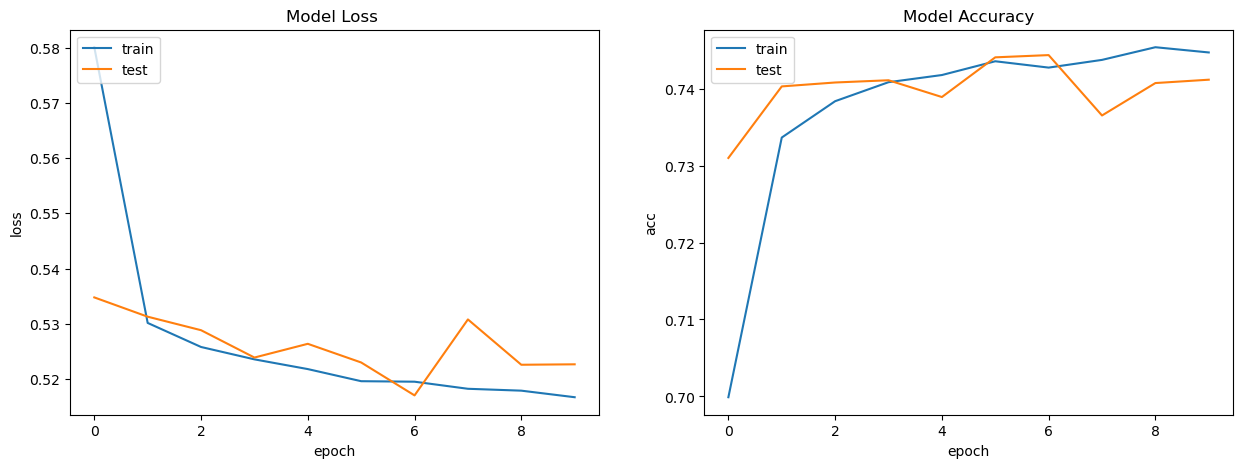

Batch Size :  1 
Epoch:  10
13765/13765 [==============================] - 2s 162us/sample - loss: 0.5227 - acc: 0.7412
Acuracy:  0.7411551
Predicted     0     1    All
Actual                      
0          4346  2444   6790
1          1119  5856   6975
All        5465  8300  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/30
27947/27947 [==============================] - 37s 1ms/sample - loss: 0.6047 - acc: 0.6815 - val_loss: 0.5447 - val_acc: 0.7208
Epoch 2/30
27947/27947 [==============================] - 36s 1ms/sample - loss: 0.5350 - acc: 0.7327 - val_loss: 0.5372 - val_acc: 0.7334
Epoch 3/30
27947/27947 [==============================] - 37s 1ms/sample - loss: 0.5305 - acc: 0.7363 - val_loss: 0.5396 - val_acc: 0.7242
Epoch 4/30
27947/27947 [==============================] - 44s 2ms/sample - loss: 0.5286 - acc: 0.7361 - val_loss: 0.5279 - val_acc: 0.7386
Epoch 5/30
27947/27947 [=========================

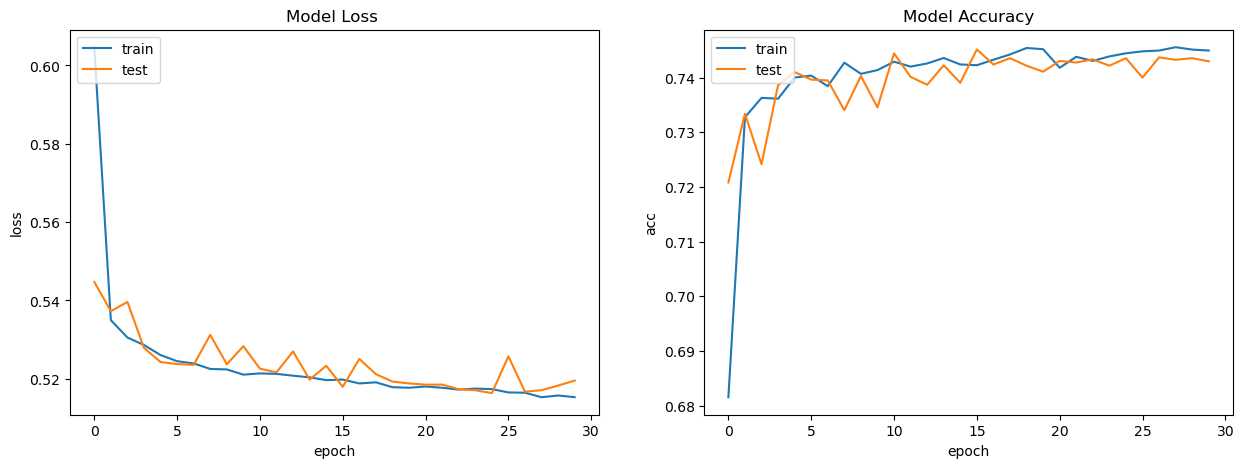

Batch Size :  8 
Epoch:  30
13765/13765 [==============================] - 2s 172us/sample - loss: 0.5195 - acc: 0.7430
Acuracy:  0.7429713
Predicted     0     1    All
Actual                      
0          4338  2452   6790
1          1086  5889   6975
All        5424  8341  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27947/27947 [==============================] - 12s 413us/sample - loss: 0.7761 - acc: 0.5973 - val_loss: 0.6115 - val_acc: 0.6872
Epoch 2/80
27947/27947 [==============================] - 13s 477us/sample - loss: 0.5769 - acc: 0.7092 - val_loss: 0.5522 - val_acc: 0.7226
Epoch 3/80
27947/27947 [==============================] - 9s 308us/sample - loss: 0.5437 - acc: 0.7324 - val_loss: 0.5383 - val_acc: 0.7317
Epoch 4/80
27947/27947 [==============================] - 9s 311us/sample - loss: 0.5351 - acc: 0.7350 - val_loss: 0.5347 - val_acc: 0.7327
Epoch 5/80
27947/27947 [===================

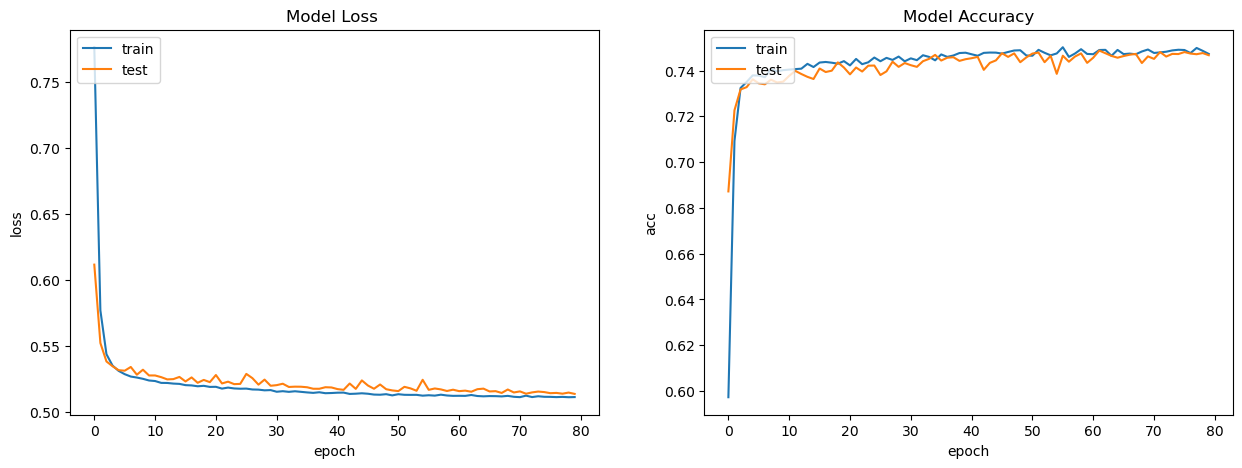

Batch Size :  32 
Epoch:  80
13765/13765 [==============================] - 3s 224us/sample - loss: 0.5137 - acc: 0.7467
Acuracy:  0.7466763
Predicted     0     1    All
Actual                      
0          4692  2098   6790
1          1389  5586   6975
All        6081  7684  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27947/27947 [==============================] - 7s 248us/sample - loss: 0.6913 - acc: 0.5327 - val_loss: 0.6583 - val_acc: 0.6100
Epoch 2/80
27947/27947 [==============================] - 5s 182us/sample - loss: 0.6228 - acc: 0.6668 - val_loss: 0.5896 - val_acc: 0.7013
Epoch 3/80
27947/27947 [==============================] - 6s 200us/sample - loss: 0.5667 - acc: 0.7156 - val_loss: 0.5504 - val_acc: 0.7228
Epoch 4/80
27947/27947 [==============================] - 5s 189us/sample - loss: 0.5439 - acc: 0.7304 - val_loss: 0.5407 - val_acc: 0.7293
Epoch 5/80
27947/27947 [====================

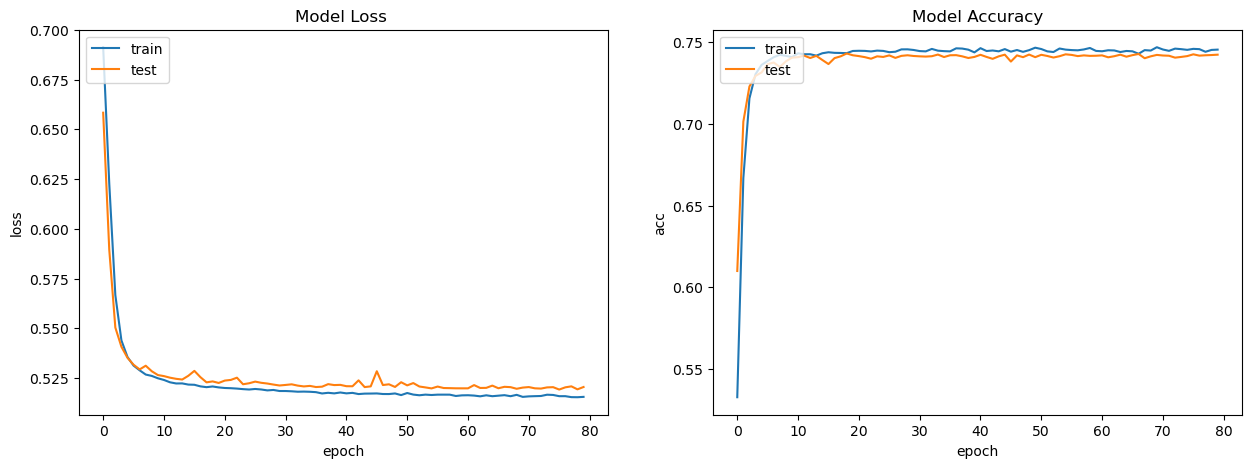

Batch Size :  64 
Epoch:  80
13765/13765 [==============================] - 2s 152us/sample - loss: 0.5205 - acc: 0.7423
Acuracy:  0.7423175
Predicted     0     1    All
Actual                      
0          4803  1987   6790
1          1560  5415   6975
All        6363  7402  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/100
27947/27947 [==============================] - 3s 112us/sample - loss: 0.6862 - acc: 0.5699 - val_loss: 0.6423 - val_acc: 0.6226
Epoch 2/100
27947/27947 [==============================] - 3s 107us/sample - loss: 0.6211 - acc: 0.6553 - val_loss: 0.5958 - val_acc: 0.6790
Epoch 3/100
27947/27947 [==============================] - 3s 112us/sample - loss: 0.5839 - acc: 0.6922 - val_loss: 0.5692 - val_acc: 0.7027
Epoch 4/100
27947/27947 [==============================] - 3s 103us/sample - loss: 0.5620 - acc: 0.7096 - val_loss: 0.5551 - val_acc: 0.7138
Epoch 5/100
27947/27947 [===============

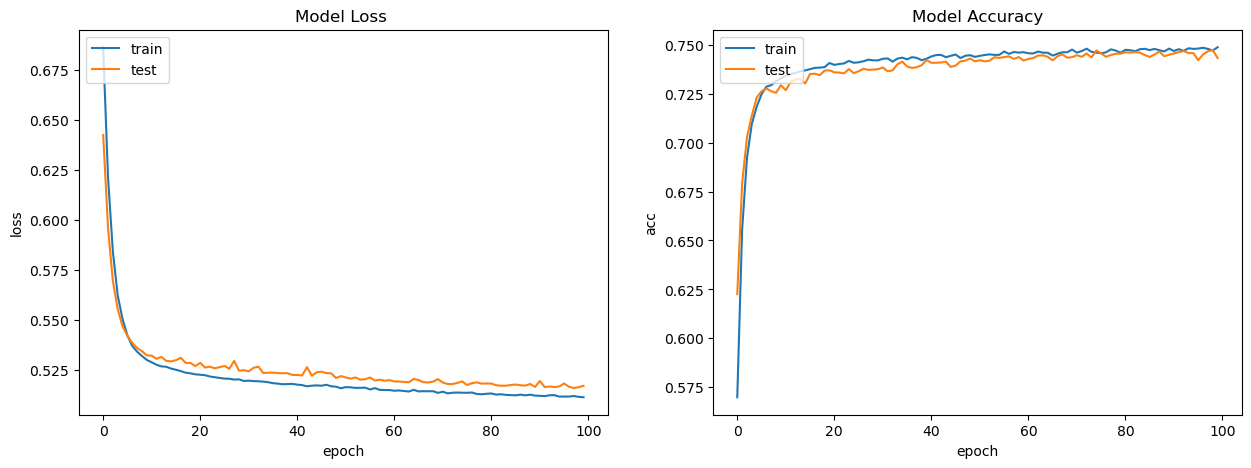

Batch Size :  128 
Epoch:  100
13765/13765 [==============================] - 2s 147us/sample - loss: 0.5169 - acc: 0.7432
Acuracy:  0.7431893
Predicted     0     1    All
Actual                      
0          4294  2496   6790
1          1039  5936   6975
All        5333  8432  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/100
27947/27947 [==============================] - 2s 79us/sample - loss: 0.6502 - acc: 0.6086 - val_loss: 0.6077 - val_acc: 0.6680
Epoch 2/100
27947/27947 [==============================] - 1s 39us/sample - loss: 0.5900 - acc: 0.6852 - val_loss: 0.5763 - val_acc: 0.6994
Epoch 3/100
27947/27947 [==============================] - 1s 38us/sample - loss: 0.5679 - acc: 0.7033 - val_loss: 0.5615 - val_acc: 0.7131
Epoch 4/100
27947/27947 [==============================] - 1s 47us/sample - loss: 0.5566 - acc: 0.7144 - val_loss: 0.5530 - val_acc: 0.7207
Epoch 5/100
27947/27947 [=================

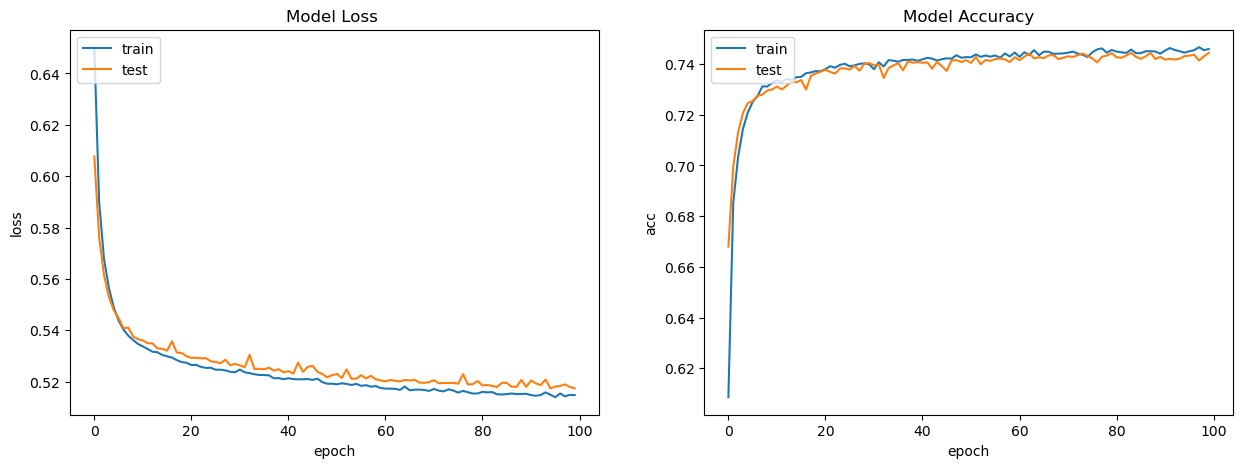

Batch Size :  256 
Epoch:  100
13765/13765 [==============================] - 2s 109us/sample - loss: 0.5174 - acc: 0.7444
Acuracy:  0.7444243
Predicted     0     1    All
Actual                      
0          4531  2259   6790
1          1259  5716   6975
All        5790  7975  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/150
27947/27947 [==============================] - 1s 40us/sample - loss: 2.3995 - acc: 0.4966 - val_loss: 0.7944 - val_acc: 0.4951
Epoch 2/150
27947/27947 [==============================] - 0s 15us/sample - loss: 0.7213 - acc: 0.5065 - val_loss: 0.7010 - val_acc: 0.5113
Epoch 3/150
27947/27947 [==============================] - 0s 16us/sample - loss: 0.6978 - acc: 0.5139 - val_loss: 0.6968 - val_acc: 0.5145
Epoch 4/150
27947/27947 [==============================] - 0s 16us/sample - loss: 0.6956 - acc: 0.5130 - val_loss: 0.6953 - val_acc: 0.5122
Epoch 5/150
27947/27947 [=================

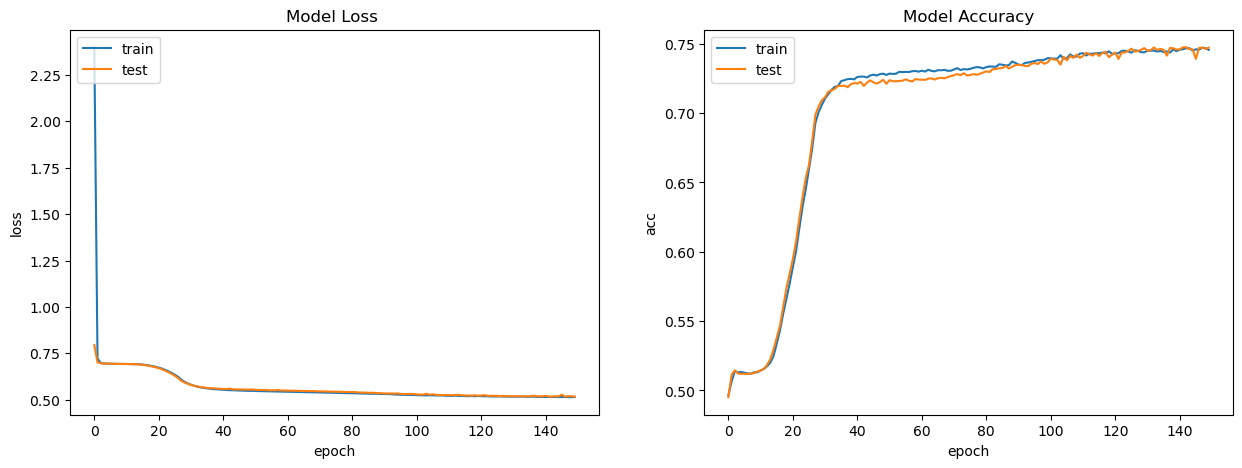

Batch Size :  512 
Epoch:  150
13765/13765 [==============================] - 1s 106us/sample - loss: 0.5168 - acc: 0.7473
Acuracy:  0.74725753
Predicted     0     1    All
Actual                      
0          4824  1966   6790
1          1513  5462   6975
All        6337  7428  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/150
27947/27947 [==============================] - 1s 31us/sample - loss: 1.0409 - acc: 0.4933 - val_loss: 0.8799 - val_acc: 0.4933
Epoch 2/150
27947/27947 [==============================] - 0s 8us/sample - loss: 0.8057 - acc: 0.4933 - val_loss: 0.7499 - val_acc: 0.4934
Epoch 3/150
27947/27947 [==============================] - 0s 8us/sample - loss: 0.7262 - acc: 0.4948 - val_loss: 0.7090 - val_acc: 0.4971
Epoch 4/150
27947/27947 [==============================] - 0s 10us/sample - loss: 0.7001 - acc: 0.5089 - val_loss: 0.6936 - val_acc: 0.5216
Epoch 5/150
27947/27947 [==================

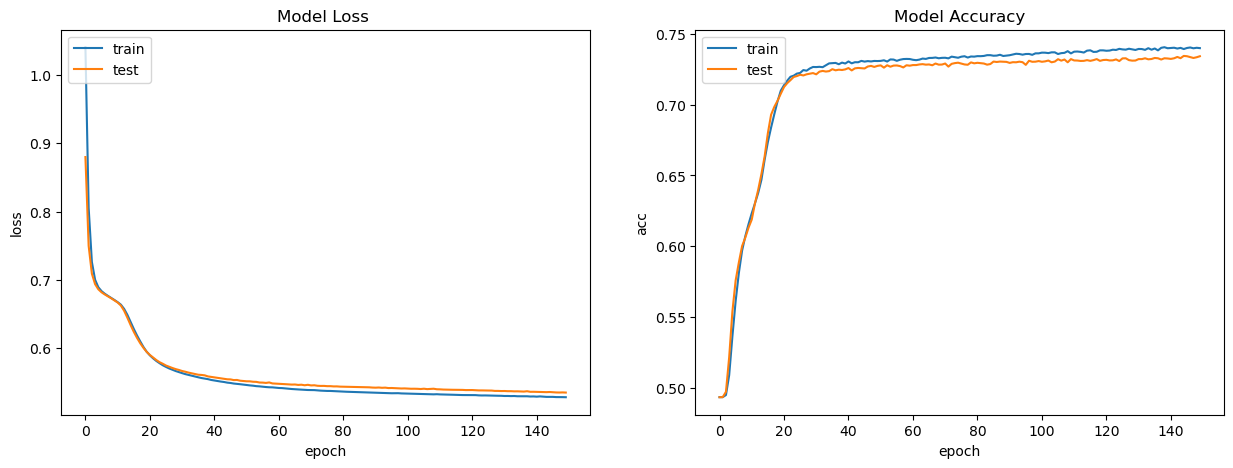

Batch Size :  1000 
Epoch:  150
13765/13765 [==============================] - 2s 114us/sample - loss: 0.5347 - acc: 0.7343
Acuracy:  0.7342535
Predicted     0     1    All
Actual                      
0          4642  2148   6790
1          1510  5465   6975
All        6152  7613  13765


In [25]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

batchesToTest = [1, 8, 32, 64, 128, 256, 512, 1000]
epochToTest = [5, 30, 80, 80, 100, 100, 150, 150]

for index, batchesTest in enumerate(batchesToTest):
    print(" ************************ Testing ************************ ")

    model = Sequential()
    model.add(Dense(5, input_dim = 21, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    results = model.fit(X_train, Y_train, epochs=epochToTest[index], batch_size=batchesToTest[index], verbose=1, validation_data = (X_test, Y_test))

    plot_acc_loss2(results)
    print("Batch Size : ", batchesToTest[index], "\nEpoch: ", epochToTest[index])
    dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
    dl_y_pred = dl_y_pred.flatten()
    print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
    print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

From the graphs above, I have tried with 8 different batch sizes and epochs as following:
- Batch Sizes: [1, 8, 32, 64, 128, 256, 512, 1000]
- Epochs: [10, 30, 80, 80, 100, 100, 150, 150]

All the testing on every batch sizes has almost the same results which is around 74%, but the 32 batch sizes with 80 epochs has the best accuracy on 74.6%. 

#### Trying with different Optimizers
- sgd
- rmspropm
- adagrad
- adam

 ************************ Testing SGD ************************ 
Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 3s 95us/sample - loss: 0.6954 - acc: 0.5865
Epoch 2/80
27947/27947 [==============================] - 2s 57us/sample - loss: 0.6692 - acc: 0.6100
Epoch 3/80
27947/27947 [==============================] - 1s 53us/sample - loss: 0.6656 - acc: 0.6182
Epoch 4/80
27947/27947 [==============================] - 1s 52us/sample - loss: 0.6621 - acc: 0.6246
Epoch 5/80
27947/27947 [==============================] - 2s 64us/sample - loss: 0.6586 - acc: 0.6263
Epoch 6/80
27947/27947 [==============================] - 1s 45us/sample - loss: 0.6547 - acc: 0.6323
Epoch 7/80
27947/27947 [==============================] - 1s 45us/sample - loss: 0.6504 - acc: 0.6368
Epoch 8/80
27947/27947 [==============================] - 1s 53us/sample - loss: 0.6460 - acc: 0.6420
Epoch 9/80
27947/27947 [==============================] - 2s 78us/sample - loss: 0.6410 - acc: 0.

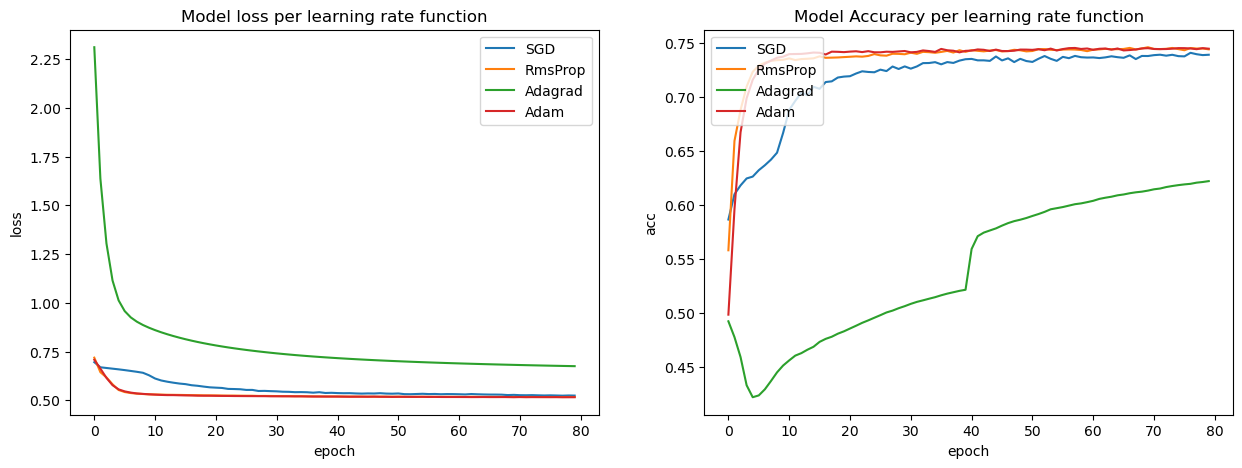

In [16]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing SGD ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])
results_sgd = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)


print(" ************************ Testing RMSPROP ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])
results_rmspropm = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)


print(" ************************ Testing ADAGRAD ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['acc'])
results_adagrad = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)


print(" ************************ Testing ADAM ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

results_adam = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

# Plotting Loss graph
plt.subplot(1,2,1)
plt.plot(results_sgd.history['loss'])
plt.plot(results_rmspropm.history['loss'])
plt.plot(results_adagrad.history['loss'])
plt.plot(results_adam.history['loss'])
plt.title('Model loss per learning rate function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['SGD', 'RmsProp', 'Adagrad', 'Adam'], loc='upper right')

plt.subplot(1,2,2)
plt.plot(results_sgd.history['acc'])
plt.plot(results_rmspropm.history['acc'])
plt.plot(results_adagrad.history['acc'])
plt.plot(results_adam.history['acc'])
plt.title('Model Accuracy per learning rate function')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['SGD', 'RmsProp', 'Adagrad', 'Adam'], loc='upper left')
plt.show()


From the graph above, we can noticed that the "Adagrad" optimizer is not working good as the accuracy is the lowest and the loss is the highest. The "SGD", "Rmsprop" and "Adam" optimizers ahs similar accuracy and loss but I would say that the "Rmsprop" and "Adam" is still sligthly better than the "SGD" optimizer. 

Hence, I will use the "Rmsprop" and "Adam" for the Grid Search.

#### Regularization Techniques
- Drop out
- Bias / No bias
- Glorot Uniform / Glorot Normal
- Checkpoint + Early Stopping

##### Dropout

 ************************ Testing With Dropout ************************ 


Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27947/27947 [==============================] - 3s 103us/sample - loss: 1.1658 - acc: 0.5106 - val_loss: 0.6965 - val_acc: 0.5053
Epoch 2/80
27947/27947 [==============================] - 2s 59us/sample - loss: 0.7086 - acc: 0.5128 - val_loss: 0.6967 - val_acc: 0.4942
Epoch 3/80
27947/27947 [==============================] - 2s 62us/sample - loss: 0.6994 - acc: 0.5082 - val_loss: 0.6948 - val_acc: 0.4960
Epoch 4/80
27947/27947 [==============================] - 2s 61us/sample - loss: 0.6935 - acc: 0.5144 - val_loss: 0.6932 - val_acc: 0.5130
Epoch 5/80
27947/27947 [==============================] - 2s 68us/sample - loss: 0.6915 - acc: 0.5235 - val_loss: 0.6890 - val_acc: 0.5565
Epoch 6/80
27947/27947 [==============================] - 2s 61us/sample - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6831 - val_acc: 0.5935
Epoch 7/80
27947/27947 [==============================] - 2s 59us/sample - loss: 0.6831 - acc: 0.5557 - val_loss: 0

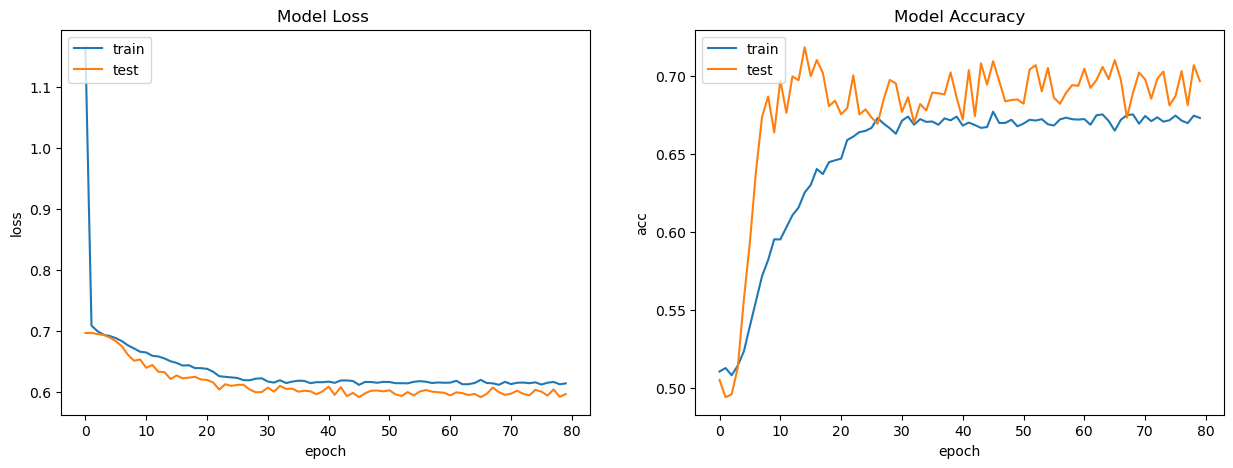

13765/13765 [==============================] - 2s 110us/sample - loss: 0.5962 - acc: 0.6964
Acuracy:  0.6964039
Predicted     0     1    All
Actual                      
0          5552  1238   6790
1          2941  4034   6975
All        8493  5272  13765


In [27]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing With Dropout ************************ ")
model = Sequential()
model.add(Dropout(0.2 , input_shape = (21,)))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

plot_acc_loss2(results)
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

The first regularization techniques I used is the dropout function. This is to prevent the model overfitting to the dataset, as we can see from the graph that the accuracy for test dataset is perform better than the training dataset. This is due to the dropout function which randomly dropping around 20% data on every layer.

##### Bias / No Bias

 ************************ Testing Bias ************************ 


Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27947/27947 [==============================] - 3s 98us/sample - loss: 0.9819 - acc: 0.5346 - val_loss: 0.6734 - val_acc: 0.5910
Epoch 2/80
27947/27947 [==============================] - 2s 57us/sample - loss: 0.6561 - acc: 0.6300 - val_loss: 0.6331 - val_acc: 0.6639
Epoch 3/80
27947/27947 [==============================] - 2s 58us/sample - loss: 0.6030 - acc: 0.6966 - val_loss: 0.5769 - val_acc: 0.7163
Epoch 4/80
27947/27947 [==============================] - 2s 55us/sample - loss: 0.5648 - acc: 0.7178 - val_loss: 0.5561 - val_acc: 0.7215
Epoch 5/80
27947/27947 [==============================] - 2s 58us/sample - loss: 0.5501 - acc: 0.7240 - val_loss: 0.5474 - val_acc: 0.7220
Epoch 6/80
27947/27947 [==============================] - 2s 56us/sample - loss: 0.5432 - acc: 0.7272 - val_loss: 0.5425 - val_acc: 0.7268
Epoch 7/80
27947/27947 [==============================] - 2s 56us/sample - loss: 0.5383 - acc: 0.7303 - val_loss: 0.

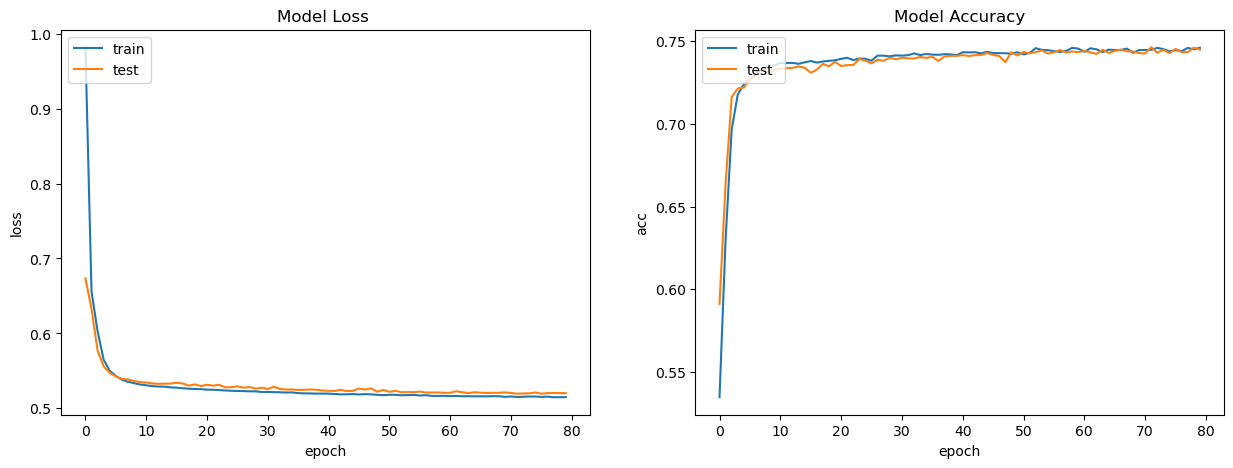

Graph for Bias


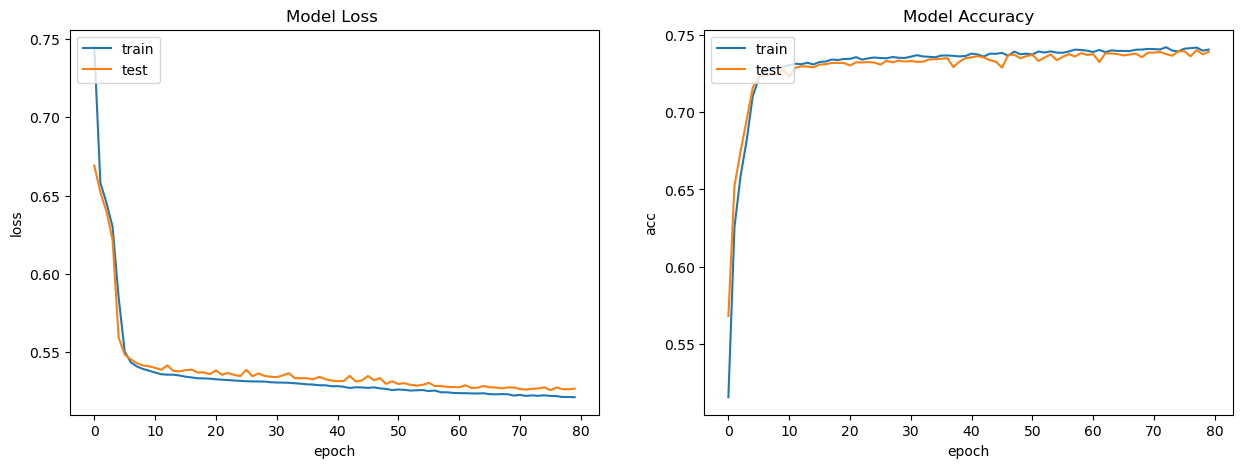

Graph for No Bias


In [28]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing Bias ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', use_bias = True))
model.add(Dense(3, activation='relu', use_bias = True))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_bias = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))


print(" ************************ Testing No Bias ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', use_bias = False))
model.add(Dense(3, activation='relu', use_bias = False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_no_bias = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))


plot_acc_loss2(results_bias)
print('Graph for Bias')
plot_acc_loss2(results_no_bias)
print('Graph for No Bias')

##### Glorot Uniform / Glorot Normal

 ************************ Testing Glorot Uniform ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27947/27947 [==============================] - 3s 93us/sample - loss: 0.9819 - acc: 0.5346 - val_loss: 0.6734 - val_acc: 0.5910
Epoch 2/80
27947/27947 [==============================] - 2s 58us/sample - loss: 0.6561 - acc: 0.6300 - val_loss: 0.6331 - val_acc: 0.6639
Epoch 3/80
27947/27947 [==============================] - 2s 55us/sample - loss: 0.6030 - acc: 0.6966 - val_loss: 0.5769 - val_acc: 0.7163
Epoch 4/80
27947/27947 [==============================] - 2s 58us/sample - loss: 0.5648 - acc: 0.7178 - val_loss: 0.5561 - val_acc: 0.7215
Epoch 5/80
27947/27947 [==============================] - 2s 56us/sample - loss: 0.5501 - acc: 0.7240 - val_loss: 0.5474 - val_acc: 0.7220
Epoch 6/80
27947/27947 [==============================] - 2s 55us/sample - loss: 0.5432 - acc: 0.7272 - val_loss: 0.5425 - val_acc: 0.7268
Epoch 7/80
27947/27947 [=================

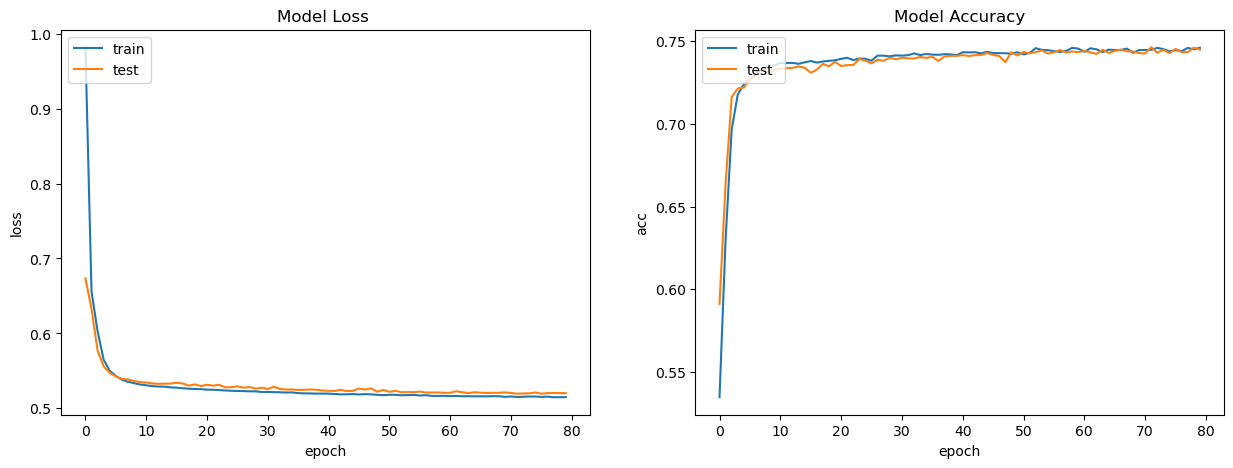

Graph for GLorot Uniform


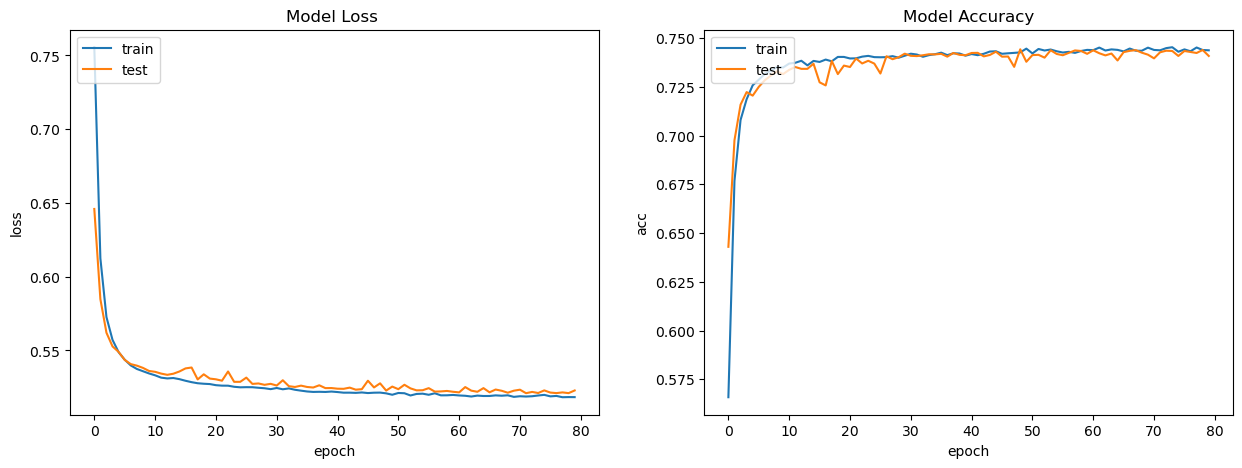

Graph for Glorot Normal


In [29]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing Glorot Uniform ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotUniform"))
model.add(Dense(3, activation='relu', kernel_initializer="GlorotUniform"))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_uni = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))


print(" ************************ Testing Glorot Normal ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(3, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_nor = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

plot_acc_loss2(results_uni)
print('Graph for GLorot Uniform')

plot_acc_loss2(results_nor)
print('Graph for Glorot Normal')

From the graph above, we can see that the Glorot Uniform and Glorot Normal have similr accuracy but the Glorot Normal has less loss comapare to the Glorot Uniform. So we will use Glorot Normal for the Grid Search technique.

##### Checkpoint + Early Stopping

 ************************ Testing  Checkpoint + Early Stopping ************************ 


Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27648/27947 [============================>.] - ETA: 0s - loss: 0.9851 - acc: 0.5342
Epoch 00001: acc improved from -inf to 0.53458, saving model to myBest.hdf5
27947/27947 [==============================] - 3s 101us/sample - loss: 0.9819 - acc: 0.5346 - val_loss: 0.6734 - val_acc: 0.5910
Epoch 2/80
27008/27947 [===========================>..] - ETA: 0s - loss: 0.6567 - acc: 0.6289
Epoch 00002: acc improved from 0.53458 to 0.63001, saving model to myBest.hdf5
27947/27947 [==============================] - 2s 60us/sample - loss: 0.6561 - acc: 0.6300 - val_loss: 0.6331 - val_acc: 0.6639
Epoch 3/80
27392/27947 [============================>.] - ETA: 0s - loss: 0.6028 - acc: 0.6974
Epoch 00003: acc improved from 0.63001 to 0.69660, saving model to myBest.hdf5
27947/27947 [==============================] - 2s 58us/sample - loss: 0.6030 - acc: 0.6966 - val_loss: 0.5769 - val_acc: 0.7163
Epoch 4/80
27904/27947 [======================

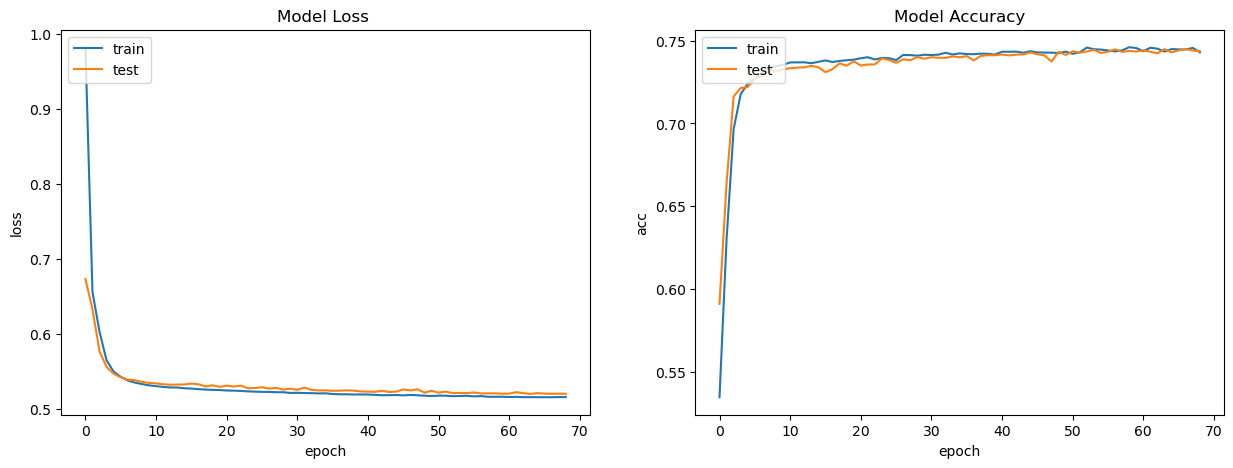

In [30]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing  Checkpoint + Early Stopping ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

checkpoint = ModelCheckpoint("myBest.hdf5", monitor='acc', save_best_only=True, mode="max", verbose=1)
earlystopping = EarlyStopping(monitor="val_loss",patience= 5)
callbacks_list = [checkpoint, earlystopping]

results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, callbacks=callbacks_list, validation_data=(X_test, Y_test))
plot_acc_loss2(results)

From the verbose above, we know that the early stopping is working as the epoch stop at around 70 even we set it at 80 epcohs.

### Most appropriate model selection

### Grid search 
- best 4 batch sizes
- best 2 optimizers
- 1 weight initializer
- 3 epochs
- early stopping allowed

In [14]:
# Function (Step) of model for training
def gs_model(optimizerIn='adam', initIn='GlorotNormal'):
    model = Sequential()
    model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer=initIn))
    model.add(Dense(3, activation='relu', kernel_initializer=initIn))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizerIn, metrics=['acc'])
    return model

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)

model = KerasClassifier(build_fn=gs_model)

# grid search epochs, batch size and optimizer
batches = [32, 64, 128, 256]
optimizers = ['rmsprop', 'adam']
epochs = [30, 80, 120]

# Checkpointing + Early Stopping
checkpoint = ModelCheckpoint("myBest.hdf5", monitor='acc', save_best_only=True, mode="max", verbose=1)
earlystopping = EarlyStopping(monitor="loss",patience= 3)
callbacks_list = [checkpoint, earlystopping]

param_grid = dict(optimizerIn=optimizers, epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train, callbacks=callbacks_list)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Train on 22357 samples
Epoch 1/30
22176/22357 [============================>.] - ETA: 0s - loss: 0.6902 - acc: 0.6132
Epoch 00001: acc improved from -inf to 0.61292, saving model to myBest.hdf5
22357/22357 [==============================] - 6s 274us/sample - loss: 0.6902 - acc: 0.6129
Epoch 2/30
22176/22357 [============================>.] - ETA: 0s - loss: 0.6275 - acc: 0.6811
Epoch 00002: acc improved from 0.61292 to 0.68122, saving model to myBest.hdf5
22357/22357 [==============================] - 5s 246us/sample - loss: 0.6272 - acc: 0.6812
Epoch 3/30
22304/22357 [============================>.] - ETA: 0s - loss: 0.5890 - acc: 0.7136
Epoch 00003: acc improved from 0.68122 to 0.71360, saving model to myBest.hdf5
22357/22357 [==============================] - 12s 558us/sample - loss: 0.5891 - acc: 0.7136
Epoch 4/30
22176/22357 [============================>.] - ETA: 0s - loss: 0.5671 - acc: 0.7238
Epoch 00004: acc improved from 0.71360 to 0.72380, saving model to myBest.hdf5
22357/2

22080/22357 [============================>.] - ETA: 0s - loss: 0.5214 - acc: 0.7390
Epoch 00015: acc did not improve from 0.74930
22357/22357 [==============================] - 4s 159us/sample - loss: 0.5214 - acc: 0.7393
Epoch 16/120
21952/22357 [============================>.] - ETA: 0s - loss: 0.5213 - acc: 0.7406
Epoch 00016: acc did not improve from 0.74930
22357/22357 [==============================] - 4s 158us/sample - loss: 0.5215 - acc: 0.7403
Epoch 17/120
22336/22357 [============================>.] - ETA: 0s - loss: 0.5211 - acc: 0.7420
Epoch 00017: acc did not improve from 0.74930
22357/22357 [==============================] - 4s 162us/sample - loss: 0.5211 - acc: 0.7421
Epoch 18/120
22016/22357 [============================>.] - ETA: 0s - loss: 0.5220 - acc: 0.7404
Epoch 00018: acc did not improve from 0.74930
22357/22357 [==============================] - 3s 120us/sample - loss: 0.5215 - acc: 0.7404
Epoch 19/120
22016/22357 [============================>.] - ETA: 0s - los

### Final Model presentation and performance evaluation

### Analysis of performance per class

### Analysis of performance for target group 
- 2 group required

In [ ]:
# definition to provide the metrics
def subMetrics(targetGroup, act, pred):
  print("Metrics for: ", targetGroup)
  correct = 0
  # parse both lists to numpy arrays
  act = np.array(act)
  pred = np.array(pred)
  # There may be an easier way to do this, however, I believe it is a manual process!
  for index, item in enumerate(act):  
    if item == pred[index]:
      correct += 1
  # print accuracy, and the confusion matrix
  accuracy = round((correct / len(act)) * 100,2) 
  print("Accuracy:", accuracy, "%")
  print(pd.crosstab( np.array(act),  np.array(pred), rownames=['Actual'], colnames=['Predicted'], margins=True))

In [ ]:
# Example for smoker target groups  
smoker_pred = []      # Smoker was label encoded as 1
smoker_actual_class = []

smokerN_pred = []        # Non-smoker was label encoded as 0
smokerN_actual_class = []

for index,row in enumerate(X_test):
    if row[4] == 1:       
        smoker_pred.append(dl_y_pred[index])
        smoker_actual_class.append(Y_test[index])
    elif row[4] == 0:     
        smokerN_pred.append(dl_y_pred[index])
        smokerN_actual_class.append(Y_test[index])

# Print the representation of each target group       
print("Smoker instances in the test set:", len(smoker_pred))        
print("Non-smoker instances in the test set:  ", len(smokerN_pred)) 


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("Smoker", smoker_actual_class, smoker_pred)
print("\n")
subMetrics("Non-smoker", smokerN_actual_class, smokerN_pred)

In [ ]:
# Example for smoker target groups  
bp_pred = []      # High Blood Pressure was label encoded as 1
bp_actual_class = []

bpN_pred = []        # Non-high Blood Pressure was label encoded as 0
bpN_actual_class = []

for index,row in enumerate(X_test):
    if row[0] == 1:       
        bp_pred.append(dl_y_pred[index])
        bp_actual_class.append(Y_test[index])
    elif row[0] == 0:     
        bpN_pred.append(dl_y_pred[index])
        bpN_actual_class.append(Y_test[index])

# Print the representation of each target group       
print("High Blood Pressure instances in the test set:", len(bp_pred))        
print("Non-high Blood Pressure instances in the test set:  ", len(bpN_pred)) 


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("High Blood Pressure", bp_actual_class, bp_pred)
print("\n")
subMetrics("Non-high Blood Pressure", bpN_actual_class, bpN_pred)

### Summary and Conclusion